Standardization and normalization in scikit-learn

The preprocessing module of scikit-learn supports standardization and normalization using the StandardardScaler() and MinMaxScaler() functions respectively. A common parameter for MinMaxScaler() is feature_range, which takes in a tuple (min, max) with a default of (0, 1). Each function needs to be initiated and then fitted to the data. Additional details can be found in the StandardScaler() documentation and MinMaxScaler() documentation.

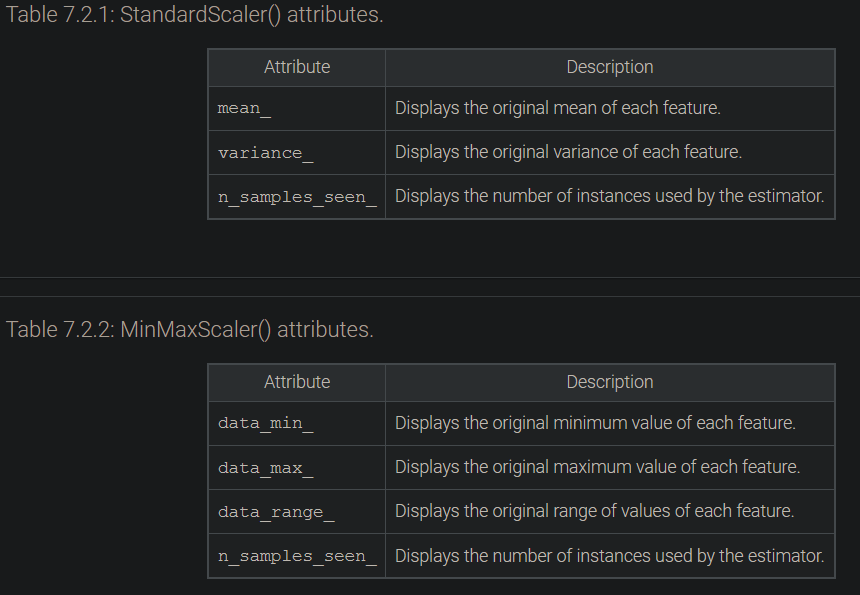

fit_transform(abalone_lw)
Purpose: This method combines two steps:

Fit: Computes the mean and standard deviation from the data (usually during training).
Transform: Applies the computed mean and standard deviation to transform the data.
Usage:

Use fit_transform when you have training data and want to both learn the transformation (mean and standard deviation) and apply it in one step.
It is typically used on the training set to fit the scaler and transform the data simultaneously.

transform(abalone_lw)
Purpose: This method only applies the transformation using parameters (mean and standard deviation) that were learned during the fit step.

Usage:

Use transform when you have fitted a scaler on some training data and now want to apply the same transformation to new or unseen data.
It uses the previously computed mean and standard deviation to transform the data without re-learning them.

In [1]:
# Import all libraries
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

In [2]:
# Load the abalone.csv data
abalone = pd.read_csv('abalone.csv')

In [3]:
abalone

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [4]:
# Return only the length and whole_weight features
abalone_lw = abalone[['length','whole_weight']]

# Define a standardization scaler to transform values
standard_scaler = StandardScaler()

# Apply scaler and view result
standard_scaler.fit_transform(abalone_lw)

array([[-0.57455813, -0.64189823],
       [-1.44898585, -1.23027711],
       [ 0.05003309, -0.30946926],
       ...,
       [ 0.6329849 ,  0.70821206],
       [ 0.84118198,  0.54199757],
       [ 1.54905203,  2.28368063]])

In [5]:
# Define a normalization scaler to transform values
minmax_scaler = MinMaxScaler()

# Apply scaler and view result
minmax_scaler.fit_transform(abalone_lw)

array([[0.51351351, 0.18133522],
       [0.37162162, 0.07915707],
       [0.61486486, 0.23906499],
       ...,
       [0.70945946, 0.415796  ],
       [0.74324324, 0.38693111],
       [0.85810811, 0.6893926 ]])

In [6]:
# Display standardized result as a dataframe
abalone_standardized = pd.DataFrame(standard_scaler.fit_transform(abalone_lw), columns=['length','whole_weight'])
abalone_standardized

,length,whole_weight
0,-0.574558,-0.641898
1,-1.448986,-1.230277
2,0.050033,-0.309469
3,-0.699476,-0.637819
4,-1.615544,-1.272086
...,...,...
4172,0.341509,0.118813
4173,0.549706,0.279929
4174,0.632985,0.708212
4175,0.841182,0.541998


In [7]:
# Display normalized result as a dataframe
abalone_normalized = pd.DataFrame(minmax_scaler.fit_transform(abalone_lw), columns=['length','whole_weight'])
abalone_normalized

,length,whole_weight
0,0.513514,0.181335
1,0.371622,0.079157
2,0.614865,0.239065
3,0.493243,0.182044
4,0.344595,0.071897
...,...,...
4172,0.662162,0.313441
4173,0.695946,0.341420
4174,0.709459,0.415796
4175,0.743243,0.386931


In [8]:
standard_scaler.mean_

array([0.5239921 , 0.82874216])

In [9]:
standard_scaler.var_

array([0.01441885, 0.24042382])

In [10]:
minmax_scaler.data_min_

array([0.075, 0.002])

In [11]:
minmax_scaler.data_max_

array([0.815 , 2.8255])

In [12]:
minmax_scaler.data_range_

array([0.74  , 2.8235])